# Wildfire Flowers - Predictive Modelling

# Exploratory Data Analysis 

## Libraries

In [48]:
import pandas as pd
import numpy as np
import openpyxl
from matplotlib import pyplot as plt
import seaborn as sns

## Data Imports

In [2]:
weather_path = "../data/weather/weather_data.xlsx"
roses_path = "../data/stems/roses/roses_2024-2025.xlsx"
hypericum_path = "../data/stems/hypericum/roses_2024-2025.xlsx"

In [3]:
weather_df = pd.read_excel("../data/weather/weather_data.xlsx")
roses_df = pd.read_excel("../data/stems/roses/roses_2024-2025.xlsx")
hypericum_df = pd.read_excel("../data/stems/hypericum/hypericum_2024-2025.xlsx")

### Weather *(Features)*

In [8]:
weather_df.head(2)

,Date,Time,AvgTemp,Temp-1,Temp-2,Avg-Hum,Hum-1,Hum-2,EC Sen.,PH Sen.,...,Wind Spd - Avg,Rain Status,Daily Rain,Rad - Avg,Rad Sum,Analog Sensor 1,OutTemp - Min,OutTemp - Max,Out Hum - Min,Out Hum - Max
0,2022-09-11,16:00:00,14.1,27.5,0.8,46.3,46.3,----,1.5,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-09-11,15:50:00,14.0,27.5,0.6,46.8,46.8,----,1.4,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
null_columns = weather_df.columns[weather_df.isnull().all()]
print(f"There are {len(null_columns)} empty columns in weather_df")

There are 0 empty columns in weather_df


In [38]:
days = len(weather_df.Date.unique())
print(f"There are {days} number of days of weather data")

There are 1109 number of days of weather data


In [129]:
rename_dict = {
    "EC  Sen.": "EC Sen.1",
    "PH  Sen.": "PH Sen.1",
    "OutTemp  - Avg": "OutTemp - Avg1",
    "Out  Hum - Avg": "Out Hum - Avg1",
    "Wind  Spd - Avg": "Wind Spd - Avg1",
    "Rain  Status": "Rain Status1",
    "Daily  Rain": "Daily Rain1",
    "Rad  - Avg": "Rad - Avg1",
    "Rad  Sum": "Rad Sum1"
}

weather_df = weather_df.rename(columns=rename_dict)
weather_df.columns

Index(['Date', 'Time', 'AvgTemp', 'Temp-1', 'Temp-2', 'Avg-Hum', 'Hum-1',
       'Hum-2', 'EC Sen.', 'PH Sen.', 'OutTemp - Avg1', 'Out Hum - Avg',
       'Wind Spd - Avg', 'Rain Status', 'Daily Rain', 'Rad - Avg', 'Rad Sum',
       'Wind Spd - Max', 'Wind Dir - Avg', 'Rain Flow', 'EC Sen. 1',
       'PH Sen. 1', 'OutTemp - Avg1', 'Out Hum - Avg1', 'Wind Spd - Avg1',
       'Rain Status1', 'Daily Rain1', 'Rad - Avg1', 'Rad Sum1',
       'Analog Sensor 1', 'OutTemp - Min', 'OutTemp - Max', 'Out Hum - Min',
       'Out Hum - Max', 'Datetime'],
      dtype='object')

### Data Availability

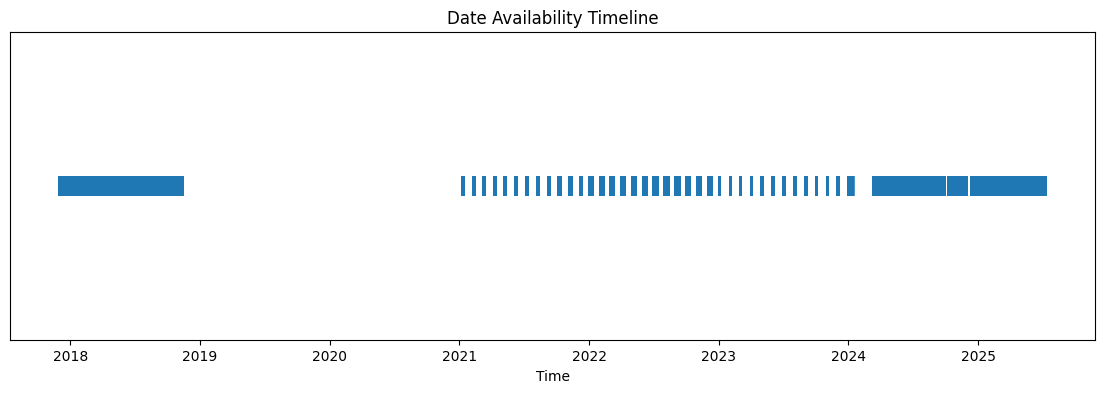

In [130]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
weather_df['Datetime'] = pd.to_datetime(weather_df['Date'].astype(str) + ' ' + weather_df['Time'].astype(str))

plt.figure(figsize=(14, 4))
sns.scatterplot(x="Datetime", y=[1]*len(weather_df), data=weather_df, marker="|", s=200)
plt.yticks([])
plt.xlabel("Time")
plt.title("Date Availability Timeline")
plt.show()

In [131]:
eda_df = pd.DataFrame()
eda_df = weather_df.isna()
eda_df.astype(int)

,Date,Time,AvgTemp,Temp-1,Temp-2,Avg-Hum,Hum-1,Hum-2,EC Sen.,PH Sen.,...,Rain Status1,Daily Rain1,Rad - Avg1,Rad Sum1,Analog Sensor 1,OutTemp - Min,OutTemp - Max,Out Hum - Min,Out Hum - Max,Datetime
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360643,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,1,1,1,1,0
360644,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,1,1,1,1,0
360645,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,1,1,1,1,0
360646,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,1,1,1,1,0


In [132]:
eda_df.columns

Index(['Date', 'Time', 'AvgTemp', 'Temp-1', 'Temp-2', 'Avg-Hum', 'Hum-1',
       'Hum-2', 'EC Sen.', 'PH Sen.', 'OutTemp - Avg1', 'Out Hum - Avg',
       'Wind Spd - Avg', 'Rain Status', 'Daily Rain', 'Rad - Avg', 'Rad Sum',
       'Wind Spd - Max', 'Wind Dir - Avg', 'Rain Flow', 'EC Sen. 1',
       'PH Sen. 1', 'OutTemp - Avg1', 'Out Hum - Avg1', 'Wind Spd - Avg1',
       'Rain Status1', 'Daily Rain1', 'Rad - Avg1', 'Rad Sum1',
       'Analog Sensor 1', 'OutTemp - Min', 'OutTemp - Max', 'Out Hum - Min',
       'Out Hum - Max', 'Datetime'],
      dtype='object')

### Temperature

In [156]:
eda_temperature_df = eda_df[["AvgTemp","Temp-1","Temp-2","OutTemp - Avg1", "OutTemp - Min", "OutTemp - Max", "Datetime"]]

### Humidity

In [139]:
eda_humidity_df = eda_df[["Avg-Hum", "Hum-1", "Hum-2", "Out Hum - Avg", "Out Hum - Avg1", "Out Hum - Min", "Out Hum - Max"]]

### EC + PH

In [140]:
eda_ec_ph_df = eda_df[["EC Sen.", "PH Sen.", "EC Sen. 1", "PH Sen. 1"]]

### Wind

In [141]:
eda_wind_df = eda_df[["Wind Spd - Avg", "Wind Spd - Max", "Wind Dir - Avg", "Wind Spd - Avg1"]]

### Rain

In [142]:
eda_rain_df = eda_df[["Rain Status", "Daily Rain", "Rain Flow", "Rain Status1", "Daily Rain1"]]

### Radiation

In [144]:
eda_radiation_df = eda_df[["Rad - Avg", "Rad Sum", "Rad - Avg1", "Rad Sum1"]]

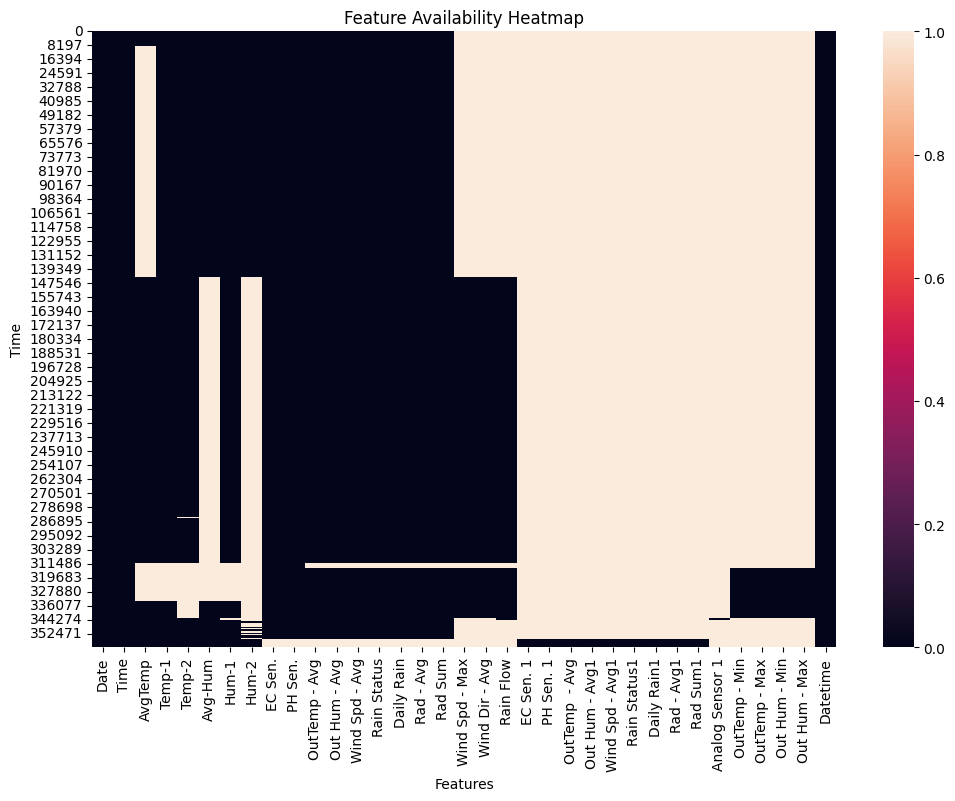

In [124]:
plt.figure(figsize=(12, 8))
sns.heatmap(eda_df)
plt.ylabel("Time")
plt.xlabel("Features")
plt.title("Feature Availability Heatmap")
plt.show()

### Flowers *(Target Variable)*

In [7]:
roses_df

,Date,Week,GH,Variety,Grade,Grade Code,Stems,FiscalYear,Media
0,2024-07-01,27,GH2,Furiosa,Thin Stems,134,31,2024-2025,H
1,2024-07-01,27,GH4,Fuchsiana,Thin Stems,134,6,2024-2025,H
2,2024-07-01,27,GH7,Comanche,Broken Stems,105,8,2024-2025,S
3,2024-07-01,27,GH5,Sweet Unique,40 CM,40,940,2024-2025,S
4,2024-07-01,27,GH4,Flambo,NaN,200,0,2024-2025,H
...,...,...,...,...,...,...,...,...,...
118442,2025-06-30,27,GH2,H3O,Thin Stems,134,12,2024-2025,H
118443,2025-06-30,27,GH6,Sweet Unique,Open,124,30,2024-2025,S
118444,2025-06-30,27,GH2,Madam Cerise,Open,124,18,2024-2025,H
118445,2025-06-30,27,GH6,Snowflake,NaN,200,0,2024-2025,H


In [6]:
hypericum_df

,Date,Week,BlockNo,Variety,Variety Code,Grade,Grade Code,Stems,FiscalYear
0,2024-07-01,27,AB02,Magical Triumph,AB02T,Broken Stems,105.0,46,2024-2025
1,2024-07-01,27,AF01,Snow Prince,AF01W,Less Berries,121.0,20,2024-2025
2,2024-07-01,27,AF01,Excellent Flair,AF01EF,Less Berries,121.0,80,2024-2025
3,2024-07-01,27,K04,Magical Seasons,K04S,Harvest,100.0,0,2024-2025
4,2024-07-01,27,AF01,Snow Prince,AF01W,Harvest,100.0,0,2024-2025
...,...,...,...,...,...,...,...,...,...
16994,2025-06-30,27,K13,Royal Princess,K13R,Harvest,100.0,0,2024-2025
16995,2025-06-30,27,L04,Royal Princess,L04R,Harvest,100.0,0,2024-2025
16996,2025-06-30,27,K12,Magical Triumph,K12T,Less Berries,121.0,88,2024-2025
16997,2025-06-30,27,K13,Royal Princess,K13R,50 CM,50.0,1930,2024-2025
